# **Mental Fitness Tracker**


* *This Notebook Grapples with Mental Fitness through the implementation of different ML Algorithms*.   

#**About Project**
*The Mental Health Fitness Tracker project is dedicated to examining and predicting the mental fitness levels of individuals across different countries, considering a range of mental disorders. The project employs **"Supervised learning"** where  **"Regression techniques"** to gain valuable insights into mental health and utilizes the available data to make predictions about individuals' well-being.*



#**Importing the Libraries**

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


##**Mount the google drive to Google colab**

In [215]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Exploratorary Data Analysis**

##**Reading the data from the csv files**

In [216]:
# Reading mental-and-substance-use-as-share-of-disease csv file
df1 = pd.read_csv('/content/drive/MyDrive/Share mental-and-substance-use-as-share-of-disease.csv')

# Reading prevalence-by-mental-and-substance-use-disorder csv file
df2 = pd.read_csv('/content/drive/MyDrive/Share prevalence-by-mental-and-substance-use-disorder.csv')

In [217]:
numeric_columns = df1.select_dtypes(include=[np.number]).columns
df1[numeric_columns] = df1[numeric_columns].fillna(df1[numeric_columns].mean())

numeric_columns = df2.select_dtypes(include=[np.number]).columns
df2[numeric_columns] = df2[numeric_columns].fillna(df2[numeric_columns].mean())

##**Preview of the dataset**

In [218]:
#mental-and-substance-use-as-share-of-disease
df1.head(5)

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.70
1,Afghanistan,AFG,1991,1.73
2,Afghanistan,AFG,1992,1.79
3,Afghanistan,AFG,1993,1.78
4,Afghanistan,AFG,1994,1.71


In [219]:
df1.tail(5)

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
6835,Zimbabwe,ZWE,2015,2.19
6836,Zimbabwe,ZWE,2016,2.28
6837,Zimbabwe,ZWE,2017,2.36
6838,Zimbabwe,ZWE,2018,2.47
6839,Zimbabwe,ZWE,2019,2.53


In [220]:
#prevalence-by-mental-and-substance-use-disorder
df2.head(5)

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.223206,0.703023,0.127700,4.713314,0.45,4.996118,0.44
1,Afghanistan,AFG,1991,0.222454,0.702069,0.123256,4.702100,0.45,4.989290,0.44
2,Afghanistan,AFG,1992,0.221751,0.700792,0.118844,4.683743,0.44,4.981346,0.45
3,Afghanistan,AFG,1993,0.220987,0.700087,0.115089,4.673549,0.44,4.976958,0.45
4,Afghanistan,AFG,1994,0.220183,0.699898,0.111815,4.670810,0.43,4.977782,0.45


In [221]:
df2.tail(4)

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
7106,Zimbabwe,ZWE,2016,0.201319,0.538593,0.096662,3.187148,0.60,3.410755,1.69
7107,Zimbabwe,ZWE,2017,0.201639,0.538589,0.097330,3.188418,0.61,3.411965,1.65
7108,Zimbabwe,ZWE,2018,0.201976,0.538585,0.097909,3.172111,0.61,3.406929,1.69
7109,Zimbabwe,ZWE,2019,0.202482,0.538580,0.098295,3.137017,0.61,3.395476,1.78


##**View Dimensions of the dataset**

In [222]:
#mental-and-substance-use-as-share-of-disease
print('mental-and-substance-use-as-share-of-disease : ',df1.shape)

print()

#prevalence-by-mental-and-substance-use-disorder
print('prevalence-by-mental-and-substance-use-disorder : ',df2.shape)

mental-and-substance-use-as-share-of-disease :  (6840, 4)

prevalence-by-mental-and-substance-use-disorder :  (7110, 10)


##**Check Null Values if present**

In [223]:
#Gives null value count of each column in mental-and-substance-use-as-share-of-disease
df1.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)      0
dtype: int64

In [224]:
#Gives null value count of each column in prevalence-by-mental-and-substance-use-disorder
df2.isnull().sum()

Entity                                                                                 0
Code                                                                                 960
Year                                                                                   0
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized      0
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized            0
Eating disorders (share of population) - Sex: Both - Age: Age-standardized             0
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized            0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)          0
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized         0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)       0
dtype: int64

##**Merging the datasets**

In [225]:
#merging two datasets mental-and-substance-use-as-share-of-disease and prevalence-by-mental-and-substance-use-disorder

data = pd.merge(df2,df1)
data.head(5)

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,0.223206,0.703023,0.127700,4.713314,0.45,4.996118,0.44,1.70
1,Afghanistan,AFG,1991,0.222454,0.702069,0.123256,4.702100,0.45,4.989290,0.44,1.73
2,Afghanistan,AFG,1992,0.221751,0.700792,0.118844,4.683743,0.44,4.981346,0.45,1.79
3,Afghanistan,AFG,1993,0.220987,0.700087,0.115089,4.673549,0.44,4.976958,0.45,1.78
4,Afghanistan,AFG,1994,0.220183,0.699898,0.111815,4.670810,0.43,4.977782,0.45,1.71


#**Data Cleaning**

In [226]:
#missing values in the dataset

data.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized                    0
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized                          0
Eating disorders (share of population) - Sex: Both - Age: Age-standardized                           0
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized                          0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized                       0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (P

##**Drop the Column**

In [227]:
data.drop('Code', axis=1, inplace=True)

##**View the data after dropping Code column**

In [228]:
data.head(5)

,Entity,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,1990,0.223206,0.703023,0.127700,4.713314,0.45,4.996118,0.44,1.70
1,Afghanistan,1991,0.222454,0.702069,0.123256,4.702100,0.45,4.989290,0.44,1.73
2,Afghanistan,1992,0.221751,0.700792,0.118844,4.683743,0.44,4.981346,0.45,1.79
3,Afghanistan,1993,0.220987,0.700087,0.115089,4.673549,0.44,4.976958,0.45,1.78
4,Afghanistan,1994,0.220183,0.699898,0.111815,4.670810,0.43,4.977782,0.45,1.71


##**Dimesions of the merged dataframe**

In [229]:
print('data size : ',data.size)
print('data shape ',data.shape)

data size :  68400
data shape  (6840, 10)


##**Renaming the Columns**

In [230]:
data.set_axis(['Country','Year','Schizophrenia','Bipolar_disorder','Eating_disorder','Anxiety','drug_usage','depression','alcohol','mental_fitness'],axis='columns',inplace=True)

<ipython-input-230-950118c2d406>:1: FutureWarning:

DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead



In [231]:
#dataframe after renaming the columns
data.head(5)

,Country,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,drug_usage,depression,alcohol,mental_fitness
0,Afghanistan,1990,0.223206,0.703023,0.127700,4.713314,0.45,4.996118,0.44,1.70
1,Afghanistan,1991,0.222454,0.702069,0.123256,4.702100,0.45,4.989290,0.44,1.73
2,Afghanistan,1992,0.221751,0.700792,0.118844,4.683743,0.44,4.981346,0.45,1.79
3,Afghanistan,1993,0.220987,0.700087,0.115089,4.673549,0.44,4.976958,0.45,1.78
4,Afghanistan,1994,0.220183,0.699898,0.111815,4.670810,0.43,4.977782,0.45,1.71


#**Information about the dataframe**

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           6840 non-null   object 
 1   Year              6840 non-null   int64  
 2   Schizophrenia     6840 non-null   float64
 3   Bipolar_disorder  6840 non-null   float64
 4   Eating_disorder   6840 non-null   float64
 5   Anxiety           6840 non-null   float64
 6   drug_usage        6840 non-null   float64
 7   depression        6840 non-null   float64
 8   alcohol           6840 non-null   float64
 9   mental_fitness    6840 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 587.8+ KB


#**Data Visualization**

<ipython-input-233-80fd782051a3>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



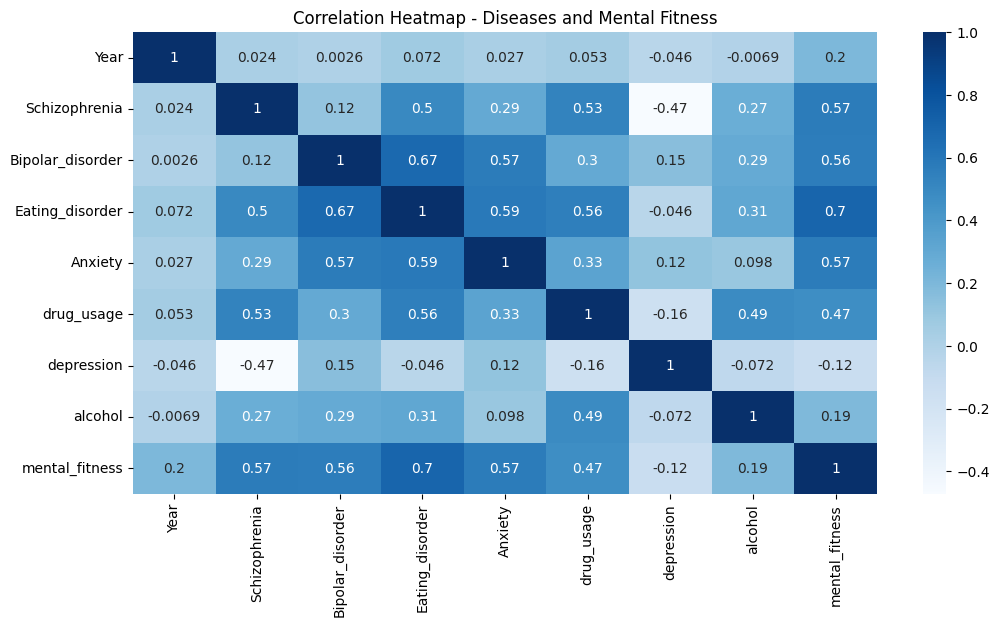

In [233]:
#VISUALISING THE CORRELATION HEATMAP OF DISEASES AND MENTAL FITNESS

plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.title('Correlation Heatmap - Diseases and Mental Fitness')
plt.show()

##**Note:**
* Eating disorder is positively correlated(0.7) observe in the above plot

##**Pairwise relations in the dataset using pairplot()**

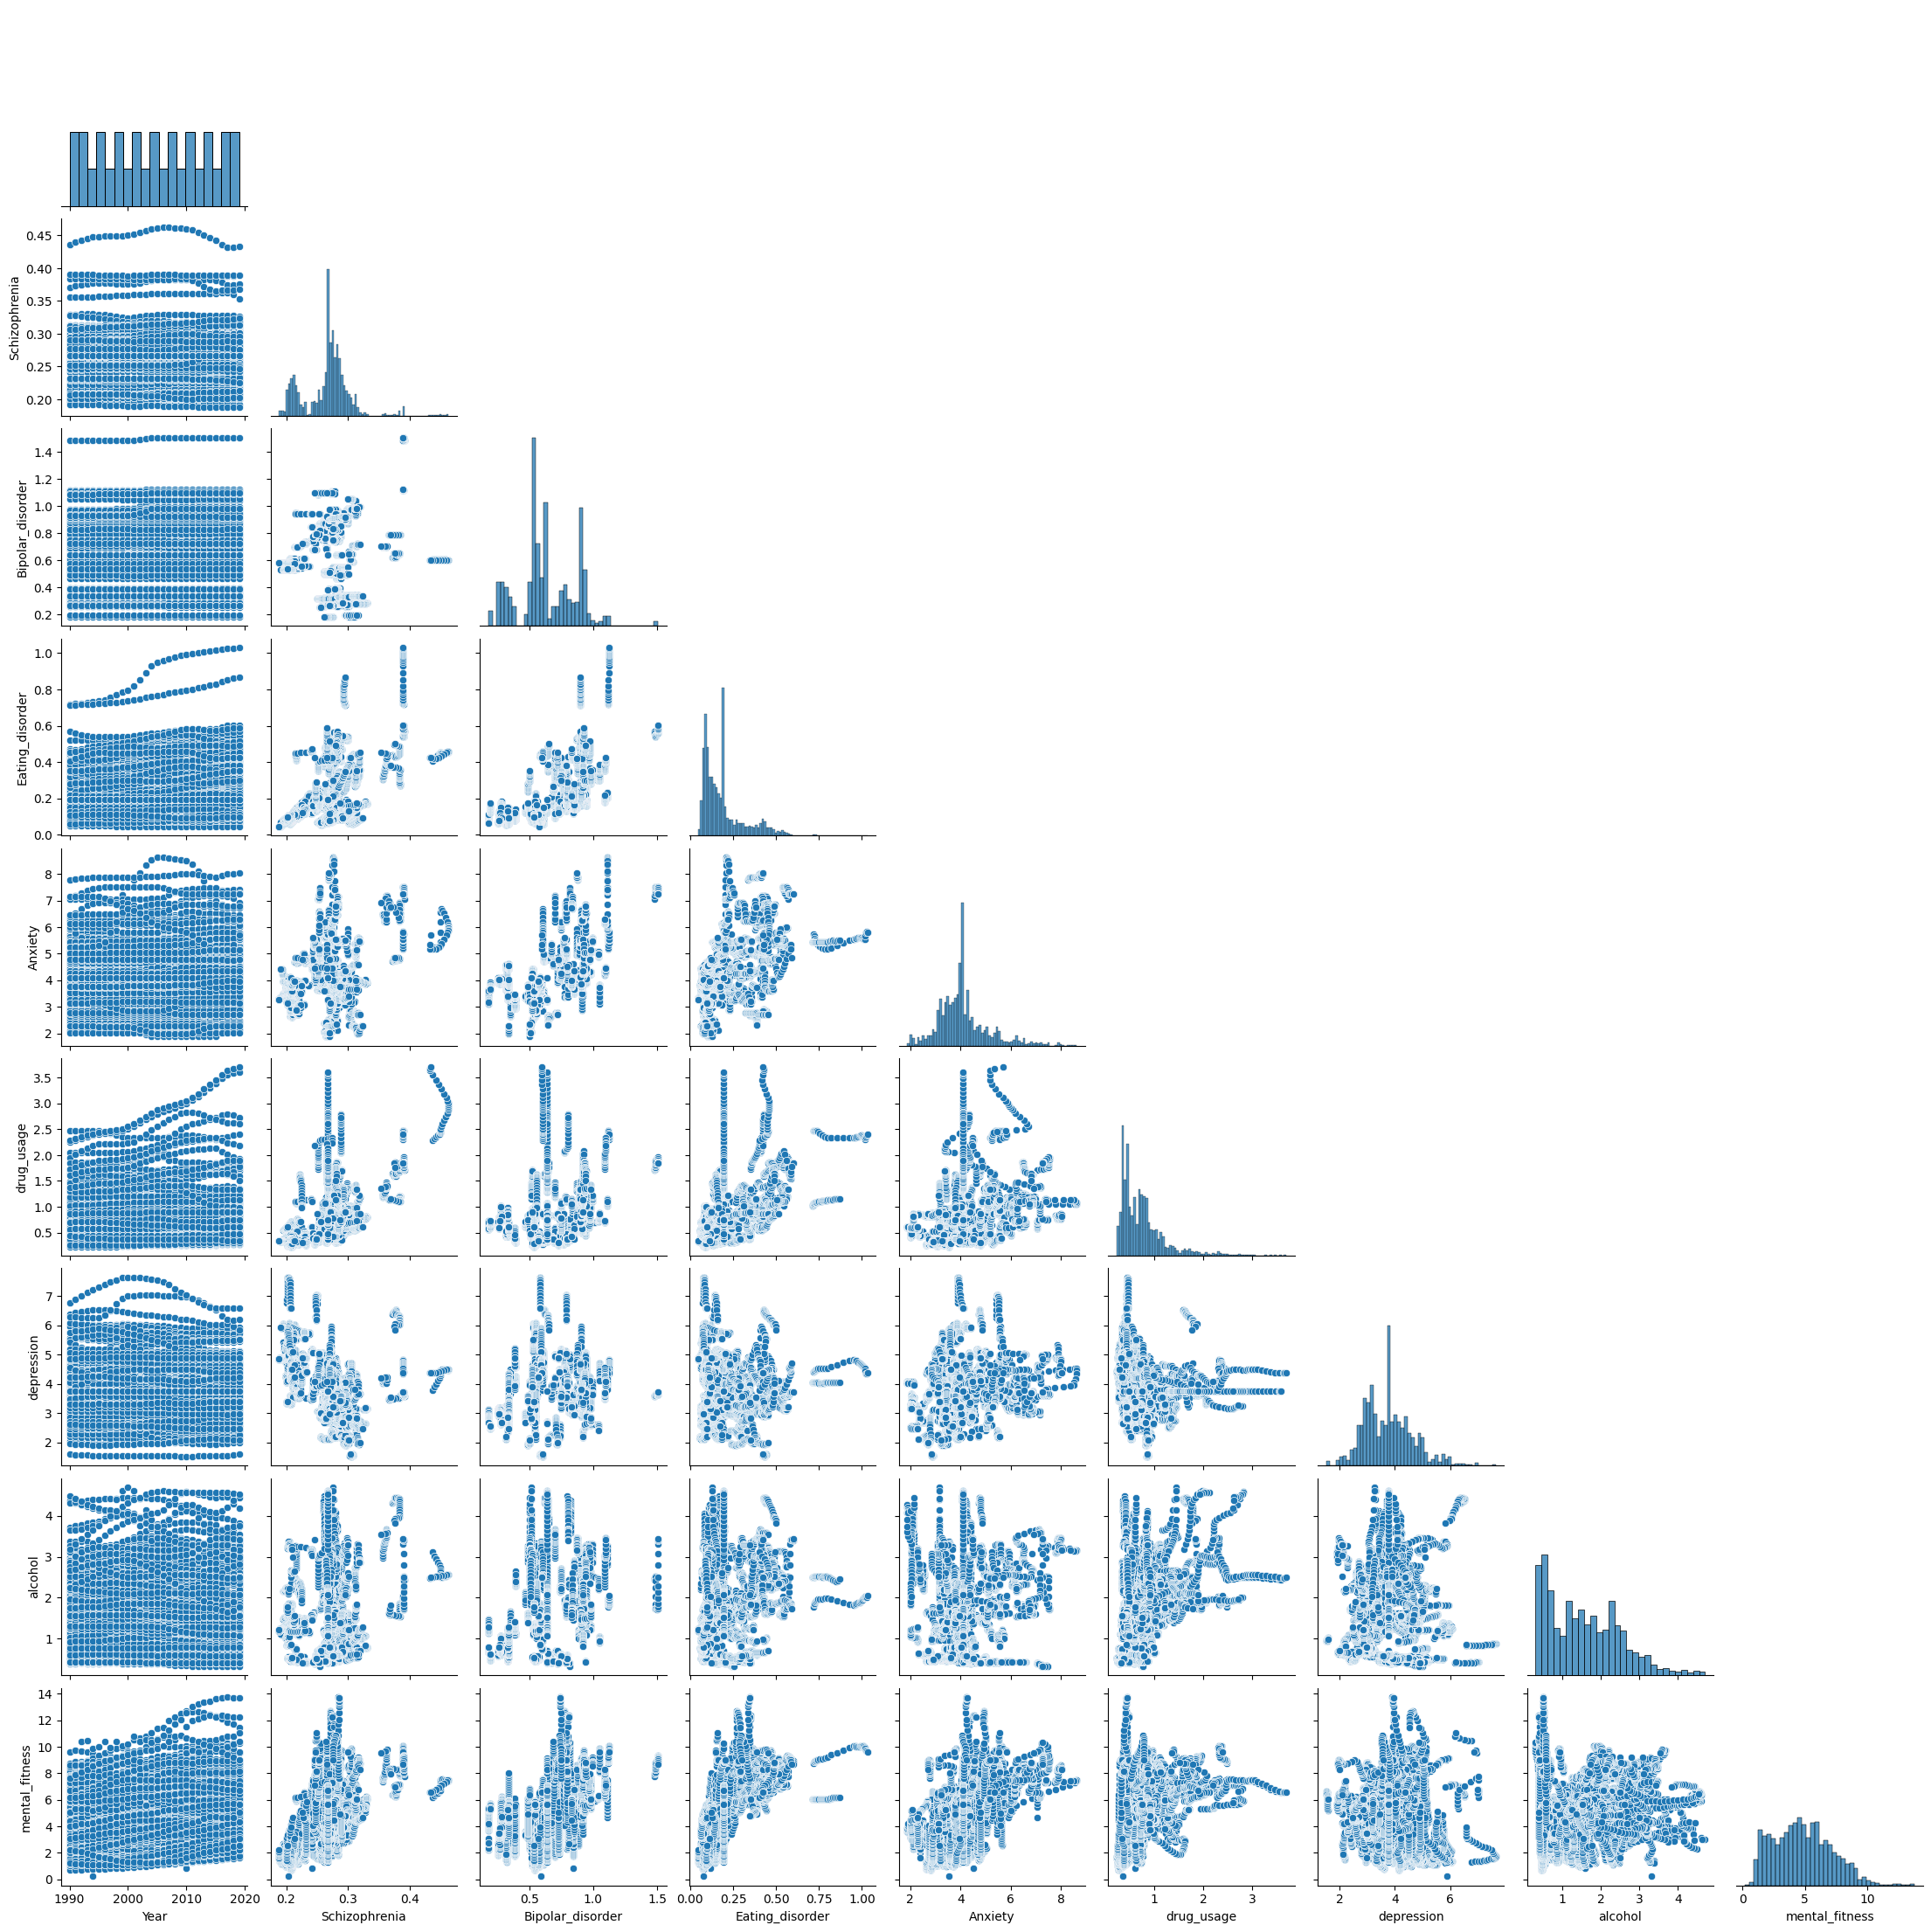

In [234]:
sns.pairplot(data,corner=True)
plt.show()

In [235]:
mean  = data['mental_fitness'].mean()
mean

4.8180701754385975

##**Piechart representation of the data**

In [236]:
fig = px.pie(data,values='mental_fitness',names='Year')
fig.show()

##***yearwise variations in mental_fitness of different countries***

In [237]:
fig = px.line(data,x="Year",y="mental_fitness",color='Country',markers=True,color_discrete_sequence=['red','blue'],template = 'plotly_dark')
fig.show()

##**Transforming the non-numerical labels(objects) to numerical labels using encoders**

In [238]:

from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
for i in data.columns:
  if data[i].dtype == 'object':
    data[i]=l.fit_transform(data[i])

In [239]:
df = data
df.shape

(6840, 10)

#**Splitting the data into training and testing datsets**

In [240]:
X = df.drop('mental_fitness',axis=1)
y = df['mental_fitness']

In [241]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [242]:
print('shapes of training and testing datasets\n')
print('x_train : ',x_train.shape)
print('y_train : ',y_train.shape)
print('x_test : ',x_test.shape)
print('y_train : ',y_test.shape)

shapes of training and testing datasets

x_train :  (4788, 9)
y_train :  (4788,)
x_test :  (2052, 9)
y_train :  (2052,)


##**NOTE:**
*  We usally take data 80% for training   and 20% for testing







#**Model Trainig**

##**FIT THE LINEAR REGRESSION MODEL**

In [245]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_predict = lr.predict(x_train) #Predicting the y based on training
mse = mean_squared_error(y_train,y_predict) #difference blw observed value and predicted value
rmse = np.sqrt(mse) #differenct blw predicted and actual values
r2 = r2_score(y_train,y_predict)
print("Linear Regression Model Performance : \n")
print("MSE : {}".format(mse))
print("RMSE : {}".format(rmse))
print("r2 : {}".format(r2))

Linear Regression Model Performance : 

MSE : 1.8740231363002033
RMSE : 1.368949647101822
r2 : 0.6534965515777855


##**FIT THE  LASSO REGRESSION MODEL**

In [247]:
from sklearn.linear_model import  Lasso
ls = Lasso(alpha=0.5)
ls.fit(x_train, y_train)
y_predict2 = ls.predict(x_train) #Predicting the y based on training
mse = mean_squared_error(y_train,y_predict2) #difference blw observed value and predicted value
rmse = np.sqrt(mse) #differenct blw predicted and actual values
r2 = r2_score(y_train,y_predict2)
print("  Lasso Regression Model Performance : \n")
print("MSE : {}".format(mse))
print("RMSE : {}".format(rmse))
print("r2 : {}".format(r2))

  Lasso Regression Model Performance : 

MSE : 3.735273992919651
RMSE : 1.932685694291664
r2 : 0.30935467429515284


##**FIT THE RANDOM FOREST REGRESSION MODEL**

In [248]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

y_predict3 = rf.predict(x_train)#Predicting the y based on training
mse = mean_squared_error(y_train,y_predict3) #difference blw observed value and predicted value
rmse = np.sqrt(mse) #differenct blw predicted and actual values
r2 = r2_score(y_train,y_predict3)
print(" Random Forest Regression Model Performance : \n")
print("MSE : {}".format(mse))
print("RMSE : {}".format(rmse))
print("r2 : {}".format(r2))

 Random Forest Regression Model Performance : 

MSE : 0.005477180482456138
RMSE : 0.07400797580299125
r2 : 0.9989872793520849


##**Note**


*   The most precise model is: Random Forest Regression
*   The least precise model is: Lasso Regression






